In [1]:
import pandas as pd
import csv 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [3]:
# 加载数据、避免中文乱码问题
data_ori = pd.read_csv('./heros.csv', encoding='gb18030')
features = [u'最大生命',u'生命成长',u'初始生命',u'最大法力', u'法力成长',u'初始法力',u'最高物攻',u'物攻成长',u'初始物攻',u'最大物防',u'物防成长',u'初始物防', u'最大每5秒回血', u'每5秒回血成长', u'初始每5秒回血', u'最大每5秒回蓝', u'每5秒回蓝成长', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features]
data

,最大生命,生命成长,初始生命,最大法力,法力成长,初始法力,最高物攻,物攻成长,初始物攻,最大物防,物防成长,初始物防,最大每5秒回血,每5秒回血成长,初始每5秒回血,最大每5秒回蓝,每5秒回蓝成长,初始每5秒回蓝,最大攻速,攻击范围
0,7350,288.8,3307,1746,94,430,321,11.570,159,397,21.14,101,98,3.357,51,37,1.571,15,28.00%,近战
1,7000,275.0,3150,1760,95,430,318,11.000,164,409,22.07,100,92,3.143,48,37,1.571,15,14.00%,近战
2,8341,329.4,3450,100,0,100,301,10.570,153,504,27.07,125,115,4.143,57,5,0.000,5,14.00%,近战
3,8476,352.8,3537,1926,104,470,273,8.357,156,394,20.36,109,117,4.214,58,42,1.786,17,14.00%,近战
4,7344,270.0,3564,0,0,0,343,12.360,170,390,20.79,99,97,3.071,54,0,0.000,0,14.00%,近战
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,5968,192.8,3269,0,0,0,427,17.860,177,349,18.57,89,81,2.214,50,0,0.000,0,28.00%,近战
65,6205,211.9,3239,1808,97,450,385,15.140,173,359,19.50,86,79,2.286,47,38,1.571,16,14.00%,近战
66,6232,210.0,3292,1822,98,450,388,15.500,171,342,18.36,85,99,3.357,52,46,1.929,19,14.00%,近战
67,6700,237.5,3375,1784,96,440,328,10.860,176,388,20.07,107,81,2.643,44,38,1.571,16,28.00%,近战


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Users/admin/Workspace/DataDev/venv/lib/python3.10/site-packages/seaborn/utils.py:95: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.draw()
/Users/admin/Workspace/DataDev/venv/lib/python3.10/site-packages/seaborn/utils.py:95: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  fig.canvas.draw()
/Users/admin/Workspace/DataDev/venv/lib/python3.10/site-packages/seaborn/utils.py:95: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from current font.
  fig.canvas.draw()
/Users/admin/Workspace/DataDev/venv/lib/python3.10/site-packages/seaborn/utils.py:95: UserWarning: Glyph 21629 (\N{CJK UNIFIED IDEOGRAPH-547D}) missing from current font.
  fig.canvas.draw()
/Users/admin/Workspace/DataDev/venv/lib/python3.10/si

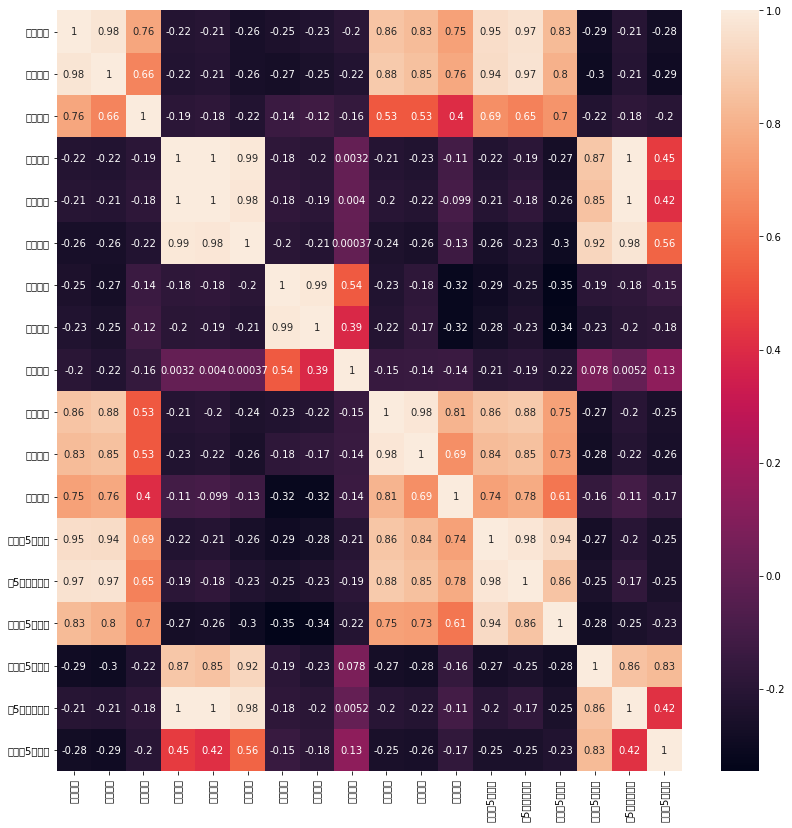

In [5]:
# 对英雄属性之间的关系进行可视化分析
# 设置 plt 正确显示中文
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
# 用热力图呈现 features_mean 字段之间的相关性
corr = data[features].corr()
plt.figure(figsize=(14, 14))
# annot=True 显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()

In [12]:
# 相关性大的属性保留一个、因此可以对属性进行降维
features_remain = [u'最大生命', u'初始生命', u'最大法力', u'最高物攻', u'初始物攻', u'最大物防', u'初始物防', u'最大每5秒回血', u'最大每5秒回蓝', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features_remain]
data[r'最大攻速'] = data[u'最大攻速'].apply(lambda x: float(x.strip('%')) / 100)
data[u'攻击范围'] = data[u'攻击范围'].map({'远程': 1, '近战': 0})
# 采用 Z-Score 规范化数据、保证每个特征维度的数据均值为 0、方差为 1
ss = StandardScaler()
data = ss.fit_transform(data)
# 构造 GMM 聚类
gmm = GaussianMixture(n_components=30, covariance_type='full')
gmm.fit(data)
# 训练数据
prediction = gmm.predict(data)
print(prediction)

[26  6 12 19  0  0  5 12  3  6 17  6 19  2 25 17 18  3 20  4 16 14  4 14
 14 14  4  8 24 28  2  1  1 24 28  1 24  7 21 11  1 24 24  1 24 11  6 21
  6 24 15  9 20 23 23 26 26  6 27  0 26 29 13 26 10  9  9 22  8]


/var/folders/gl/k85fznm93rjg0hmcn_57s_980000gq/T/ipykernel_40805/100776093.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[r'最大攻速'] = data[u'最大攻速'].apply(lambda x: float(x.strip('%')) / 100)
/var/folders/gl/k85fznm93rjg0hmcn_57s_980000gq/T/ipykernel_40805/100776093.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[u'攻击范围'] = data[u'攻击范围'].map({'远程': 1, '近战': 0})


In [13]:
# 将分组结果输出到 CSV 文件中
data_ori.insert(0, '分组', prediction)
data_ori.to_csv('./hero_out.csv', index=False, sep=',')
print(data_ori)

ValueError: cannot insert 分组, already exists

In [14]:
# 聚类结果评估方式
from sklearn.metrics import calinski_harabasz_score

print(calinski_harabasz_score(data, prediction))

23.366798668303684
